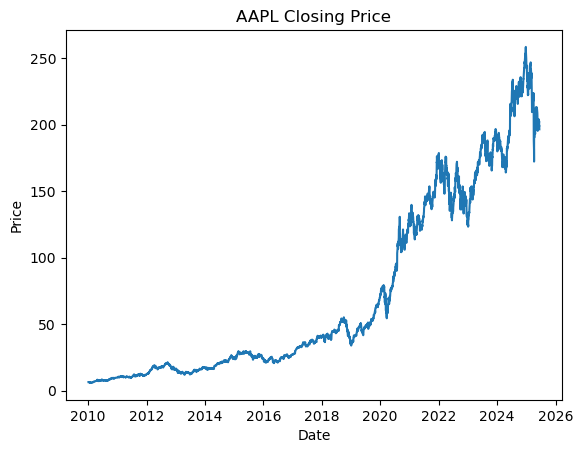

In [10]:
#CLOSING PRICE VISUALIZATION

import pandas as pd 
import matplotlib.pyplot as plt 

df=pd.read_csv('aapl_stock.csv',parse_dates=['Date'])
plt.plot(df['Date'], df['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

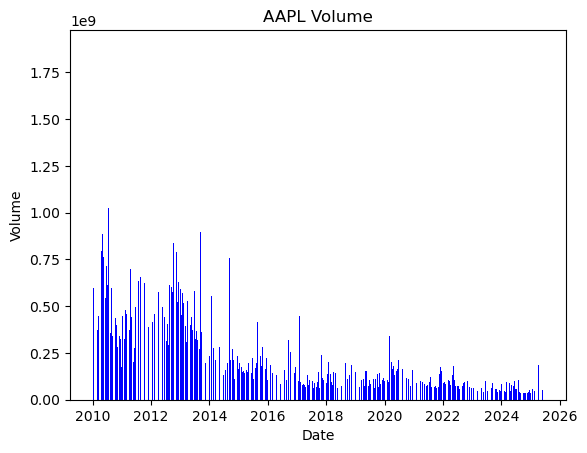

In [11]:
#VOLUME VISUALIZATION

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('aapl_stock.csv', parse_dates=['Date'])
plt.bar(df['Date'], df['Volume'], color='blue')
plt.title('AAPL Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

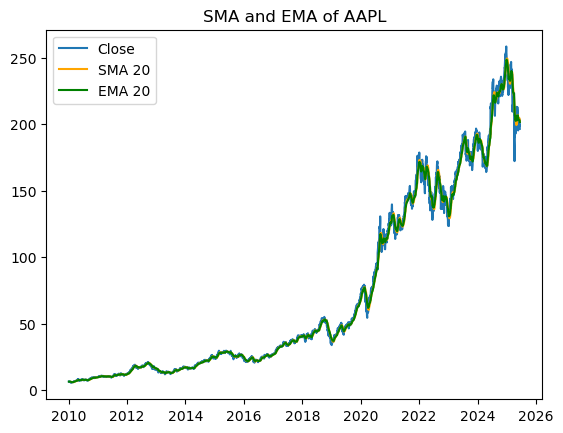

In [7]:
#Moving averages (SMA and EMA)
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('aapl_stock.csv', parse_dates=['Date'])
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['SMA20'], label='SMA 20', color='orange')
plt.plot(df['Date'], df['EMA20'], label='EMA 20', color='green')
plt.legend()
plt.title('SMA and EMA of AAPL')
plt.show()

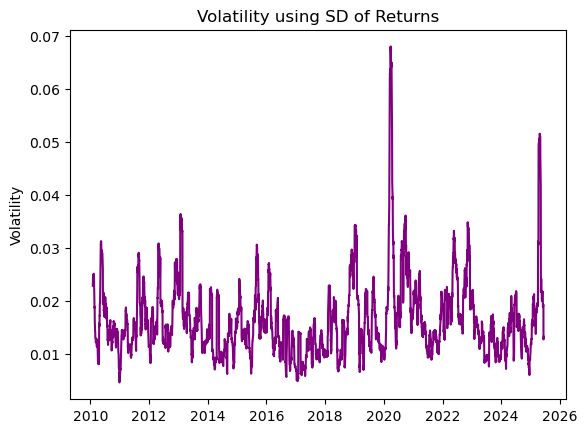

In [10]:
#VOLATILITY
#Using Standard Deviation of Returns

df = pd.read_csv('aapl_stock.csv', parse_dates=['Date'])
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=20).std()

plt.plot(df['Date'], df['Volatility'], color='purple')
plt.title('Volatility using SD of Returns')
plt.ylabel('Volatility')
plt.show()


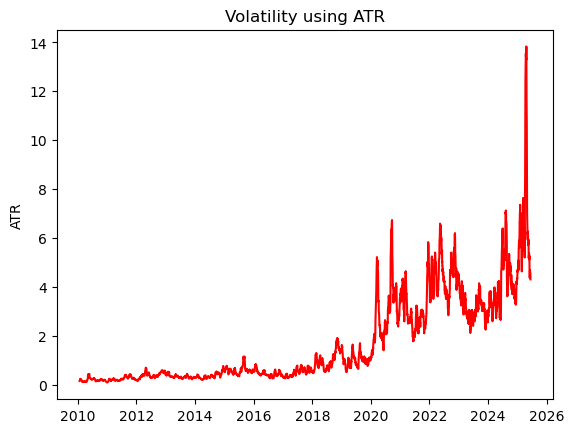

In [11]:
#Using Average True Range(ATR)
df['High-Low'] = df['High'] - df['Low']
df['High-Close'] = abs(df['High'] - df['Close'].shift())
df['Low-Close'] = abs(df['Low'] - df['Close'].shift())

df['TR'] = df[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
df['ATR'] = df['TR'].rolling(window=14).mean()

plt.plot(df['Date'], df['ATR'], color='red')
plt.title('Volatility using ATR')
plt.ylabel('ATR')
plt.show()


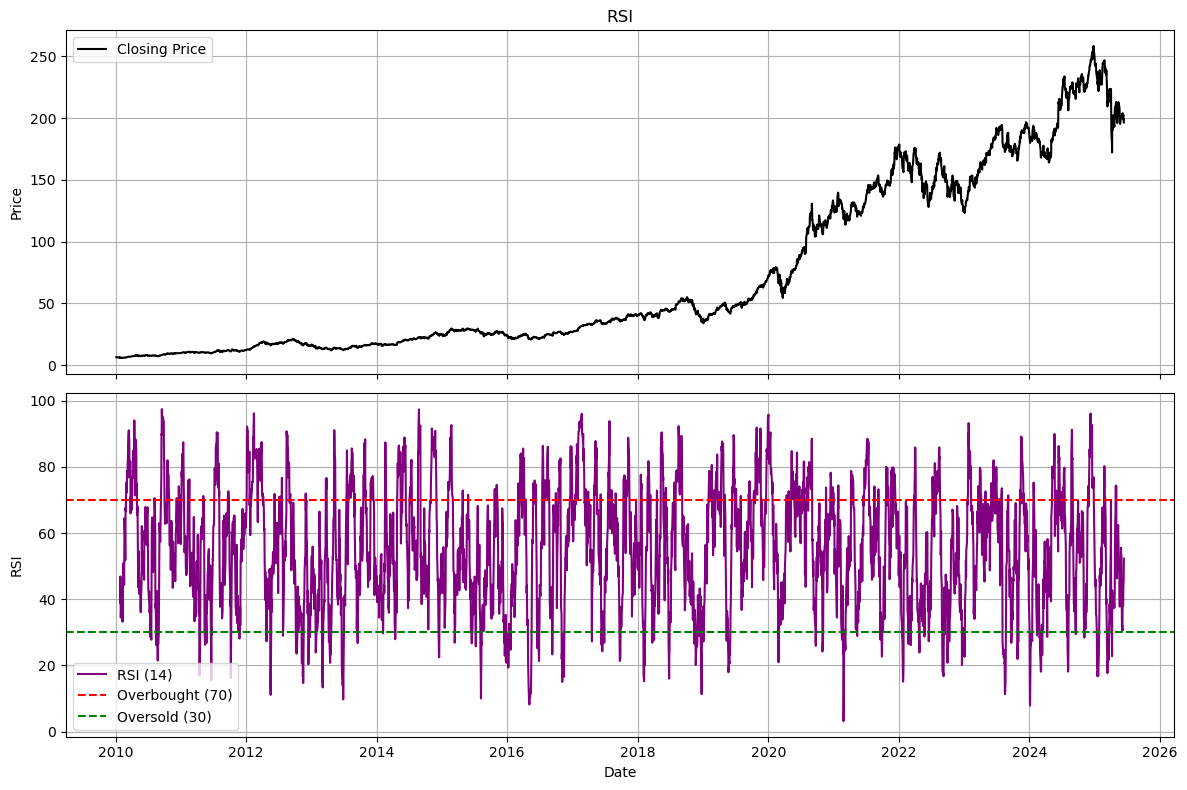

In [20]:
#RSI

df = pd.read_csv("aapl_stock.csv", parse_dates=["Date"])


close = df['Close']
price_change = close - close.shift(1)

gain = price_change.clip(lower=0)
loss = -price_change.clip(upper=0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

df['RSI'] = rsi


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)


ax1.plot(df['Date'], df['Close'], color='black', label='Closing Price')
ax1.set_title("RSI")
ax1.set_ylabel("Price")
ax1.grid()
ax1.legend()


ax2.plot(df['Date'], df['RSI'], color='purple', label='RSI (14)')
ax2.axhline(70, color='red', linestyle='--', label='Overbought (70)')
ax2.axhline(30, color='green', linestyle='--', label='Oversold (30)')
ax2.set_ylabel("RSI")
ax2.set_xlabel("Date")
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()


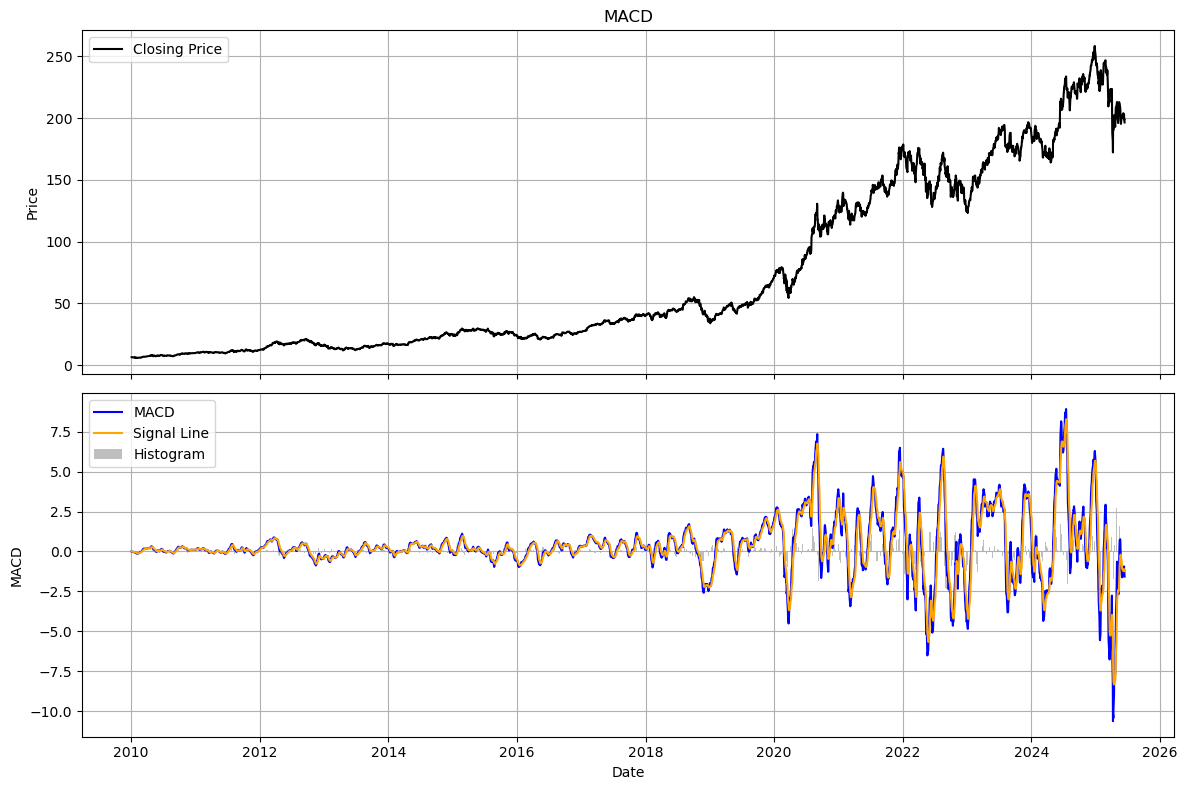

In [9]:
#MACD

df = pd.read_csv("aapl_stock.csv", parse_dates=["Date"])


close = df['Close']
ema_12 = close.ewm(span=12, adjust=False).mean()
ema_26 = close.ewm(span=26, adjust=False).mean()

macd = ema_12 - ema_26
signal = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

df['MACD'] = macd
df['Signal'] = signal
df['Histogram'] = histogram


fig, (ax1, ax2) =plt.subplots(2, 1, figsize=(12, 8), sharex=True)


ax1.plot(df['Date'], df['Close'], color='black', label='Closing Price')
ax1.set_title("MACD")
ax1.set_ylabel("Price")
ax1.grid()
ax1.legend()


ax2.plot(df['Date'], df['MACD'], label='MACD', color='blue')
ax2.plot(df['Date'], df['Signal'], label='Signal Line', color='orange')
ax2.bar(df['Date'], df['Histogram'], label='Histogram', color='gray', alpha=0.5)
ax2.set_ylabel("MACD")
ax2.set_xlabel("Date")
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

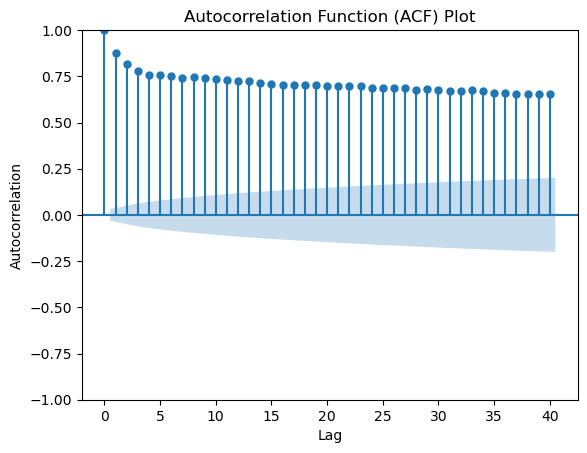

In [7]:
#DETECTING SEASONALITY USING AUTOCORRELATION

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("aapl_stock.csv", parse_dates=["Date"])

plt.figure(figsize=(12, 6))
plot_acf(df['Volume'], lags=40) 
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

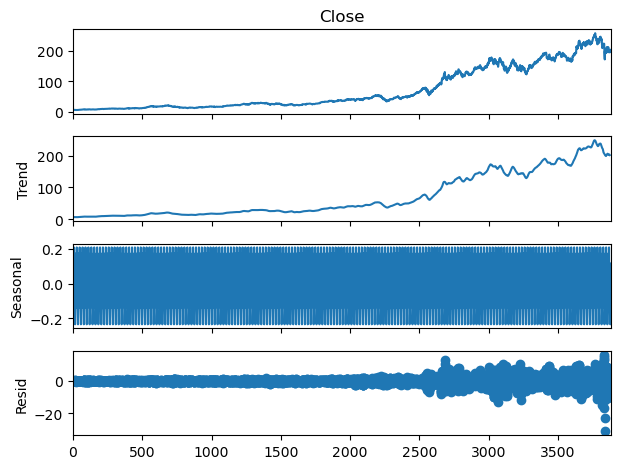

In [8]:
#SEASONAL DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Close"], model="additive", period=21)
result.plot()
plt.show()

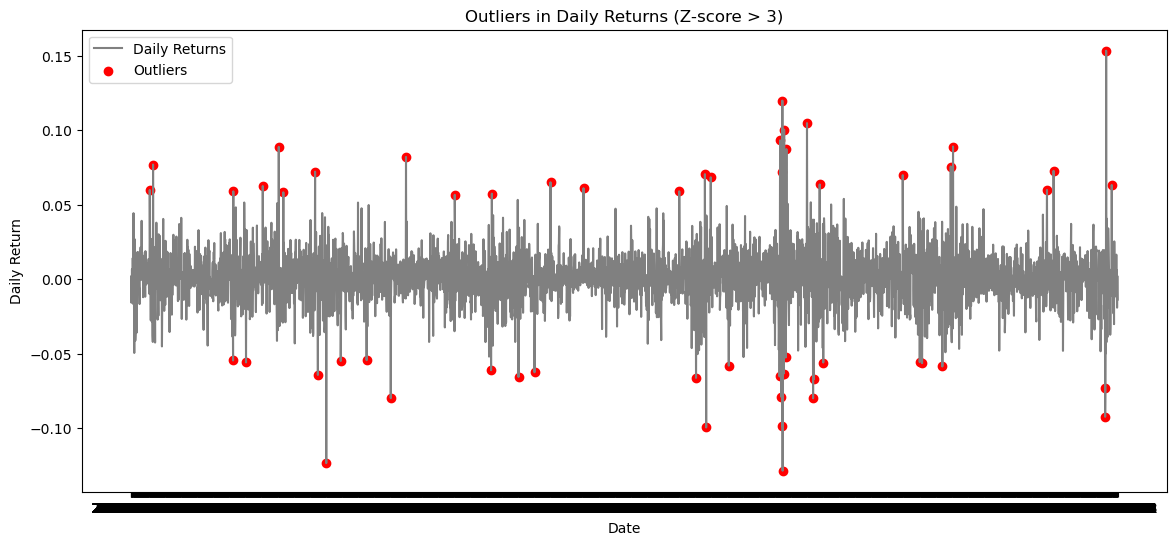

In [7]:
#OUTLIERS

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("aapl_stock.csv")


df["Returns"] = df["Close"].pct_change()
df["z_returns"] = (df["Returns"] - df["Returns"].mean()) / df["Returns"].std()
df["return_outlier"] = df["z_returns"].abs() > 3

plt.figure(figsize=(14,6))
plt.plot(df["Date"], df["Returns"], label="Daily Returns", color="gray")
plt.scatter(df["Date"][df["return_outlier"]], df["Returns"][df["return_outlier"]], color="red", label="Outliers")
plt.title("Outliers in Daily Returns (Z-score > 3)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.show()


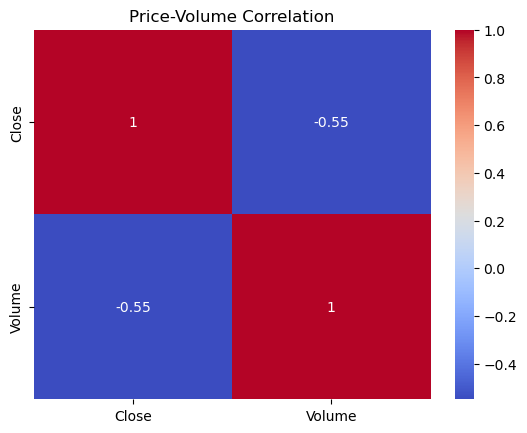

In [8]:
#PRICE-VOLUME CORRELATION

import seaborn as sns
import pandas as pd

df = pd.read_csv("aapl_stock.csv", parse_dates=["Date"])

corr = df[["Close", "Volume"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Price-Volume Correlation")
plt.show()